## importing libs

In [5]:
import pandas as pd
import heartpy as hp
import matplotlib.pyplot as plt
import numpy as np
import tqdm


In [2]:
df = pd.read_csv('ECG_training.csv')
df.head()

,ECG,Classification
0,"-127,-162,-197,-229,-245,-254,-261,-265,-268,-...",N
1,"128,157,189,226,250,257,262,265,268,269,268,26...",N
2,"519,619,723,827,914,956,955,934,920,900,889,88...",A
3,"-266,-316,-367,-407,-423,-423,-401,-367,-329,-...",N
4,"21,22,24,26,28,31,32,34,34,35,35,34,34,34,35,3...",N


In [3]:
sample_rate = 300

In [7]:

np.savetxt("GFG.csv", 
           list(df['ECG'][0].split(',')),
           delimiter =", ", 
           fmt ='% s')

## extract features from ECG using HeartPy

In [6]:
features=[]
noisy_indices=[]

for i in tqdm.tqdm_notebook(range(len(df))):
    np.savetxt("GFG.csv", 
           list(df.ECG[i].split(',')),
           delimiter =", ", 
           fmt ='% s')
    
    data = hp.get_data('GFG.csv')
    
    #run analysis
    try:
        wd, m = hp.process(data, sample_rate)


        #display computed measures
        
        temp = list(m.values())
        temp.append(df['Classification'][i])
        features.append(temp)
        
    except Exception as e:
        print(e)
        noisy_indices.append(i)
        


<ipython-input-6-31d5b204f285>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm.tqdm_notebook(range(len(df))):


C:\Users\ashwi\anaconda3\lib\site-packages\scipy\interpolate\fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
C:\Users\ashwi\anaconda3\lib\site-packages\numpy\ma\core.py:5246: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
C:\Users\ashwi\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,



----------------
Could not determine best fit for given signal. Please check the source signal.
 Probable causes:
- detected heart rate falls outside of bpmmin<->bpmmax constraints
- no detectable heart rate present in signal
- very noisy signal (consider filtering and scaling)
If you're sure the signal contains heartrate data, consider filtering and/or scaling first.
----------------


----------------
Could not determine best fit for given signal. Please check the source signal.
 Probable causes:
- detected heart rate falls outside of bpmmin<->bpmmax constraints
- no detectable heart rate present in signal
- very noisy signal (consider filtering and scaling)
If you're sure the signal contains heartrate data, consider filtering and/or scaling first.
----------------


----------------
Could not determine best fit for given signal. Please check the source signal.
 Probable causes:
- detected heart rate falls outside of bpmmin<->bpmmax constraints
- no detectable heart rate present in 

C:\Users\ashwi\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ashwi\anaconda3\lib\site-packages\numpy\core\_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,



----------------
Could not determine best fit for given signal. Please check the source signal.
 Probable causes:
- detected heart rate falls outside of bpmmin<->bpmmax constraints
- no detectable heart rate present in signal
- very noisy signal (consider filtering and scaling)
If you're sure the signal contains heartrate data, consider filtering and/or scaling first.
----------------


----------------
Could not determine best fit for given signal. Please check the source signal.
 Probable causes:
- detected heart rate falls outside of bpmmin<->bpmmax constraints
- no detectable heart rate present in signal
- very noisy signal (consider filtering and scaling)
If you're sure the signal contains heartrate data, consider filtering and/or scaling first.
----------------


----------------
Could not determine best fit for given signal. Please check the source signal.
 Probable causes:
- detected heart rate falls outside of bpmmin<->bpmmax constraints
- no detectable heart rate present in 

C:\Users\ashwi\anaconda3\lib\site-packages\scipy\interpolate\fitpack2.py:253: UserWarning: 
A theoretically impossible result was found during the iteration
process for finding a smoothing spline with fp = s: s too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)



----------------
Could not determine best fit for given signal. Please check the source signal.
 Probable causes:
- detected heart rate falls outside of bpmmin<->bpmmax constraints
- no detectable heart rate present in signal
- very noisy signal (consider filtering and scaling)
If you're sure the signal contains heartrate data, consider filtering and/or scaling first.
----------------


----------------
Could not determine best fit for given signal. Please check the source signal.
 Probable causes:
- detected heart rate falls outside of bpmmin<->bpmmax constraints
- no detectable heart rate present in signal
- very noisy signal (consider filtering and scaling)
If you're sure the signal contains heartrate data, consider filtering and/or scaling first.
----------------


----------------
Could not determine best fit for given signal. Please check the source signal.
 Probable causes:
- detected heart rate falls outside of bpmmin<->bpmmax constraints
- no detectable heart rate present in 

In [8]:
print('Extracted for number of features:',len(features))
print('number of anamolies:',len(noisy_indices))

Extracted for number of features: 3481
number of anamolies: 19


## Saving Data without noise as csv

In [73]:
m.keys()

dict_keys(['bpm', 'ibi', 'sdnn', 'sdsd', 'rmssd', 'pnn20', 'pnn50', 'hr_mad', 'sd1', 'sd2', 's', 'sd1/sd2', 'breathingrate'])

In [10]:
import csv

# field names 
fields = ['bpm', 'ibi', 'sdnn', 'sdsd', 'rmssd', 'pnn20', 'pnn50', 'hr_mad', 'sd1', 'sd2', 's', 'sd1/sd2', 'breathingrate','Classification']

with open('pro_data_no_noise.csv', 'w') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
      
    write.writerow(fields)
    write.writerows(features)

## Filtering and scaling Noisy data

In [11]:
def filter_and_visualise(data, sample_rate):
    '''
    function that filters using remove_baseline_wander 
    and visualises result
    '''
    
    filtered = hp.remove_baseline_wander(data, sample_rate)

    plt.figure(figsize=(12,3))
    plt.title('signal with baseline wander removed')
    plt.plot(filtered)
    plt.show()

    #And let's plot both original and filtered signal, and zoom in to show peaks are not moved
    #We'll also scale both signals with hp.scale_data
    #This is so that they have the same amplitude so that the overlap is better visible
    plt.figure(figsize=(12,3))
    plt.title('zoomed in signal with baseline wander removed, original signal overlaid')
    plt.plot(hp.scale_data(data[200:1200]))
    plt.plot(hp.scale_data(filtered[200:1200]))
    plt.show()
    
    return filtered



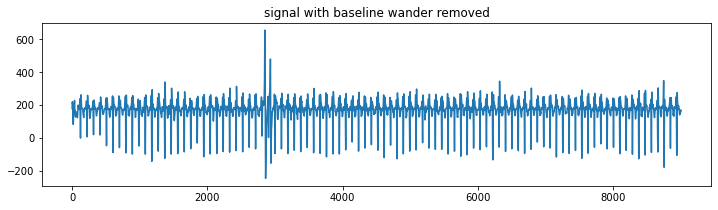

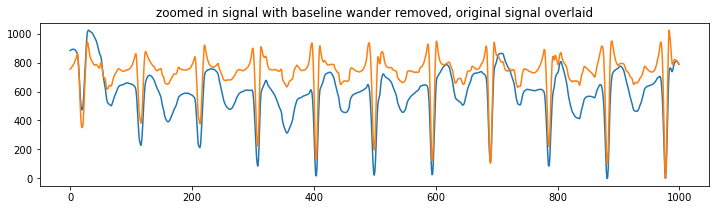

C:\Users\ashwi\anaconda3\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


bpm: 72.776280
ibi: 824.444444
sdnn: 172.869750
sdsd: 0.000000
rmssd: 6.666667
pnn20: 0.000000
pnn50: 0.000000
hr_mad: 6.666667
sd1: 0.000000
sd2: 0.000000
s: 0.000000
sd1/sd2: nan
breathingrate: nan


<Figure size 864x288 with 0 Axes>

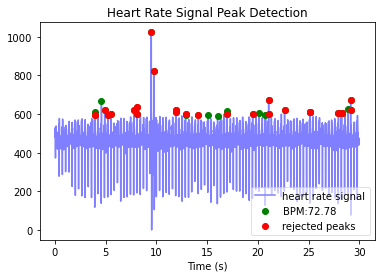

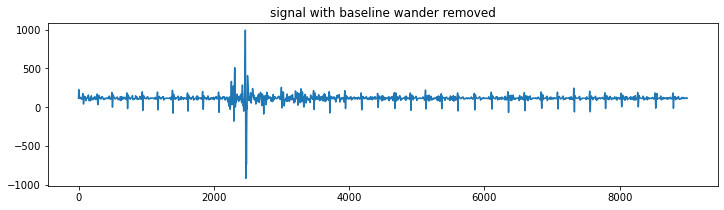

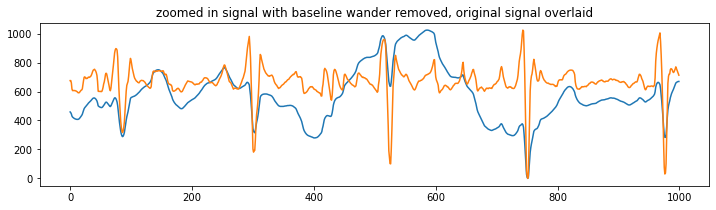

C:\Users\ashwi\anaconda3\lib\site-packages\numpy\ma\core.py:5246: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
C:\Users\ashwi\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\ashwi\anaconda3\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-12-091168bd60b0>:17: UserWarning: Warning: converting a masked element to nan.
  print('%s: %f' %(measure, m[measure]))


bpm: 81.355932
ibi: 737.500000
sdnn: 12.990381
sdsd: nan
rmssd: nan
pnn20: nan
pnn50: nan
hr_mad: 6.666667
sd1: nan
sd2: nan
s: nan
sd1/sd2: nan
breathingrate: 0.339213


<Figure size 864x288 with 0 Axes>

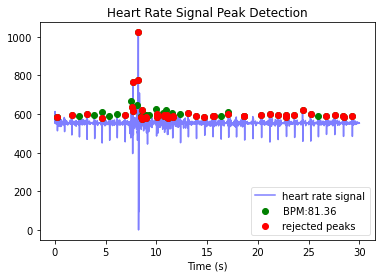

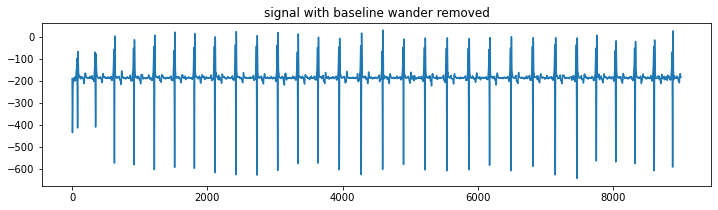

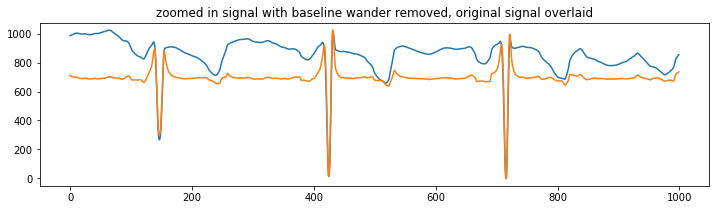

bpm: 93.506494
ibi: 641.666667
sdnn: 32.102267
sdsd: nan
rmssd: nan
pnn20: nan
pnn50: nan
hr_mad: 6.666667
sd1: nan
sd2: nan
s: nan
sd1/sd2: nan
breathingrate: 0.389864


C:\Users\ashwi\anaconda3\lib\site-packages\numpy\ma\core.py:5246: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
C:\Users\ashwi\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\ashwi\anaconda3\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-12-091168bd60b0>:17: UserWarning: Warning: converting a masked element to nan.
  print('%s: %f' %(measure, m[measure]))


<Figure size 864x288 with 0 Axes>

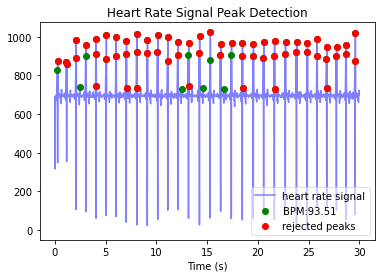

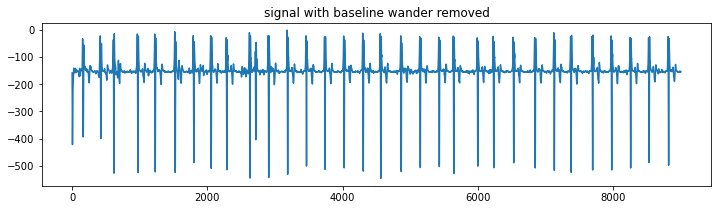

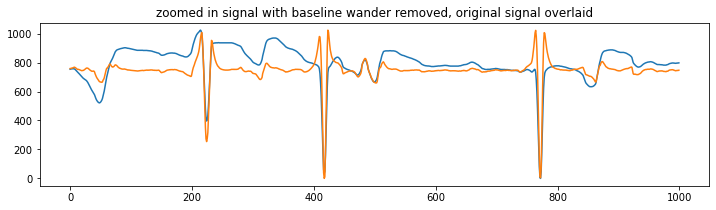

C:\Users\ashwi\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ashwi\anaconda3\lib\site-packages\numpy\core\_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\ashwi\anaconda3\lib\site-packages\numpy\ma\core.py:5246: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
C:\Users\ashwi\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\ashwi\anaconda3\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-12-091168bd60b0>:17: UserWarning: Warning: converting a

bpm: nan
ibi: nan
sdnn: nan
sdsd: nan
rmssd: nan
pnn20: nan
pnn50: nan
hr_mad: nan
sd1: nan
sd2: nan
s: nan
sd1/sd2: nan
breathingrate: nan


<Figure size 864x288 with 0 Axes>

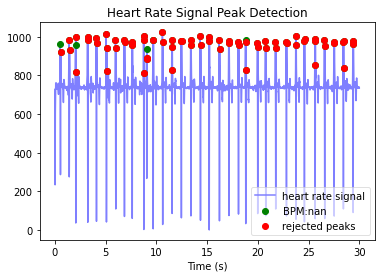

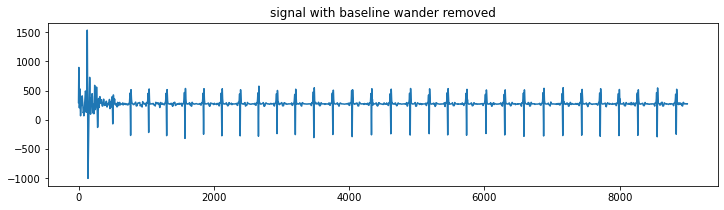

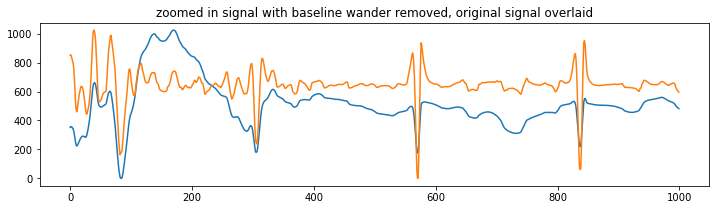

bpm: 389.891697
ibi: 153.888889
sdnn: 62.610396
sdsd: 62.242060
rmssd: 88.798565
pnn20: 0.666667
pnn50: 0.333333
hr_mad: 20.000000
sd1: 46.996191
sd2: 63.799454
s: 9419.535727
sd1/sd2: 0.736624
breathingrate: 1.085776


C:\Users\ashwi\anaconda3\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 864x288 with 0 Axes>

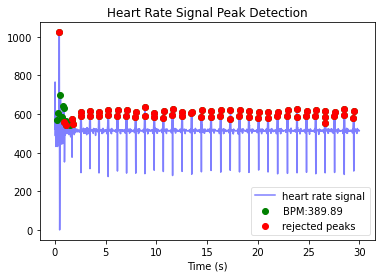

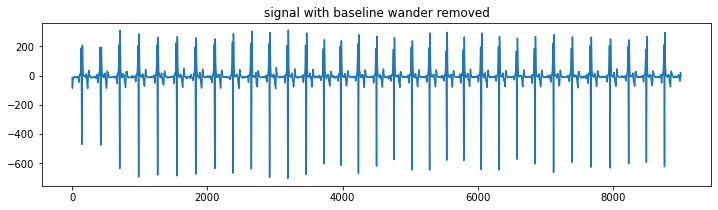

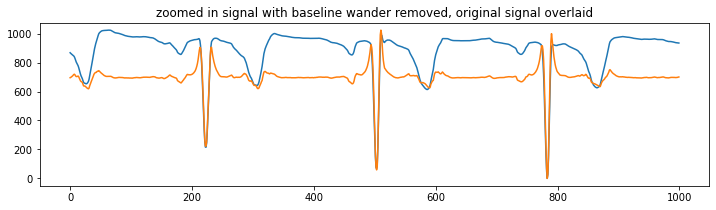

C:\Users\ashwi\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ashwi\anaconda3\lib\site-packages\numpy\core\_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\ashwi\anaconda3\lib\site-packages\numpy\ma\core.py:5246: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
C:\Users\ashwi\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\ashwi\anaconda3\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-12-091168bd60b0>:17: UserWarning: Warning: converting a

bpm: nan
ibi: nan
sdnn: nan
sdsd: nan
rmssd: nan
pnn20: nan
pnn50: nan
hr_mad: nan
sd1: nan
sd2: nan
s: nan
sd1/sd2: nan
breathingrate: nan


<Figure size 864x288 with 0 Axes>

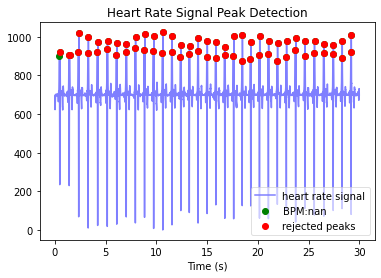

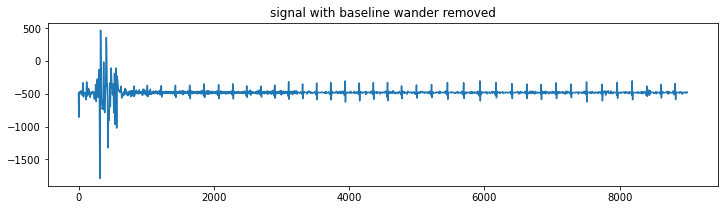

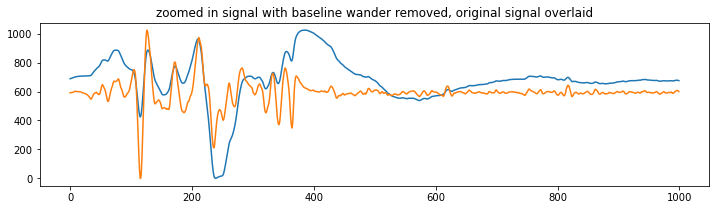

bpm: 83.003953
ibi: 722.857143
sdnn: 38.737151
sdsd: 15.051959
rmssd: 21.523194
pnn20: 0.269231
pnn50: 0.000000
hr_mad: 15.000000
sd1: 14.824194
sd2: 51.916587
s: 2417.837499
sd1/sd2: 0.285539
breathingrate: 0.148287


C:\Users\ashwi\anaconda3\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 864x288 with 0 Axes>

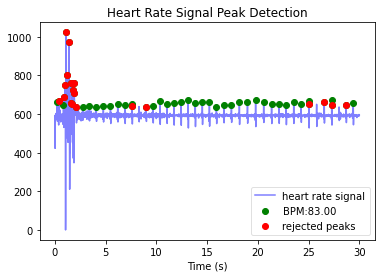

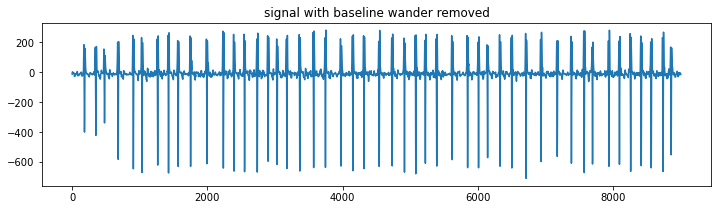

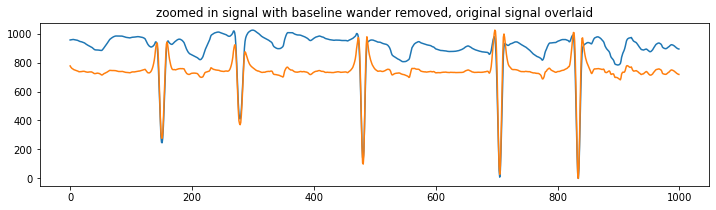

bpm: 198.473282
ibi: 302.307692
sdnn: 239.564721
sdsd: 98.542669
rmssd: 456.012740
pnn20: 1.000000
pnn50: 1.000000
hr_mad: 186.666667
sd1: 264.199471
sd2: 106.122122
s: 88082.116530
sd1/sd2: 2.489580
breathingrate: 0.127405


C:\Users\ashwi\anaconda3\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 864x288 with 0 Axes>

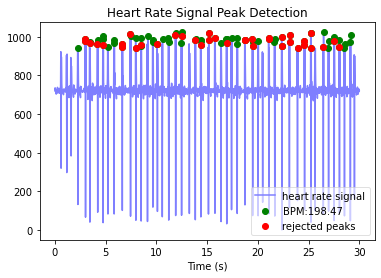

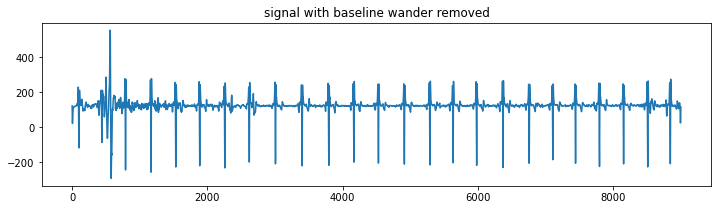

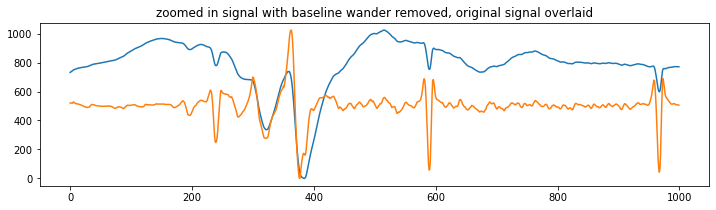

bpm: 122.448980
ibi: 490.000000
sdnn: 0.000000
sdsd: nan
rmssd: nan
pnn20: nan
pnn50: nan
hr_mad: 0.000000
sd1: nan
sd2: nan
s: nan
sd1/sd2: nan
breathingrate: nan


C:\Users\ashwi\anaconda3\lib\site-packages\numpy\ma\core.py:5246: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
C:\Users\ashwi\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\ashwi\anaconda3\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-12-091168bd60b0>:17: UserWarning: Warning: converting a masked element to nan.
  print('%s: %f' %(measure, m[measure]))


<Figure size 864x288 with 0 Axes>

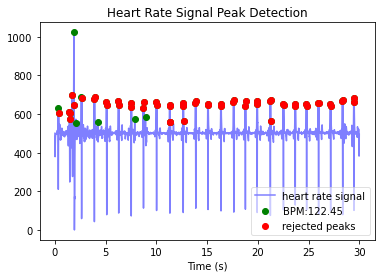

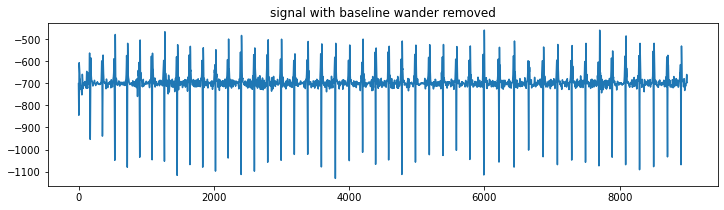

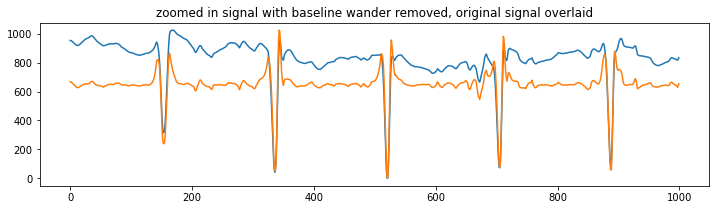

C:\Users\ashwi\anaconda3\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


bpm: 184.397163
ibi: 325.384615
sdnn: 269.703980
sdsd: 76.806493
rmssd: 532.091146
pnn20: 1.000000
pnn50: 0.977778
hr_mad: 248.333333
sd1: 372.727315
sd2: 58.969104
s: 69050.308981
sd1/sd2: 6.320722
breathingrate: 0.059168


<Figure size 864x288 with 0 Axes>

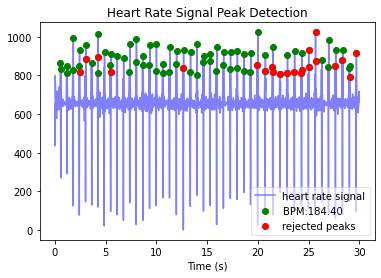

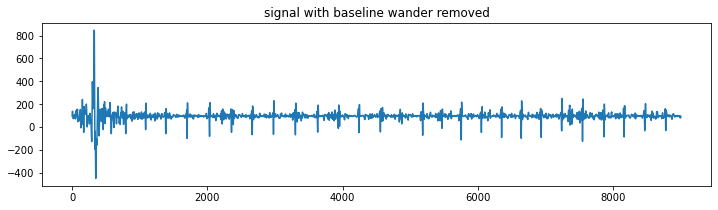

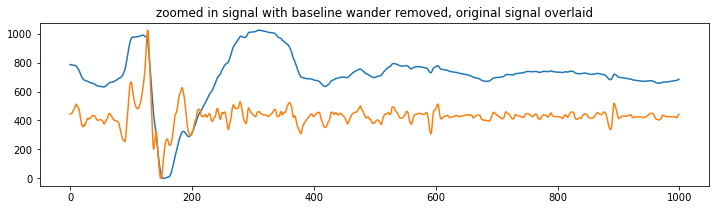

C:\Users\ashwi\anaconda3\lib\site-packages\numpy\ma\core.py:5246: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
C:\Users\ashwi\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\ashwi\anaconda3\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-12-091168bd60b0>:17: UserWarning: Warning: converting a masked element to nan.
  print('%s: %f' %(measure, m[measure]))


bpm: 155.172414
ibi: 386.666667
sdnn: 0.000000
sdsd: nan
rmssd: nan
pnn20: nan
pnn50: nan
hr_mad: 0.000000
sd1: nan
sd2: nan
s: nan
sd1/sd2: nan
breathingrate: nan


<Figure size 864x288 with 0 Axes>

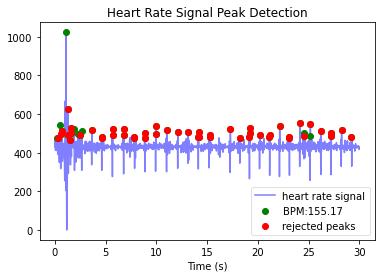

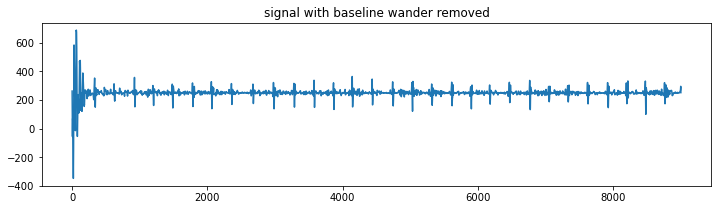

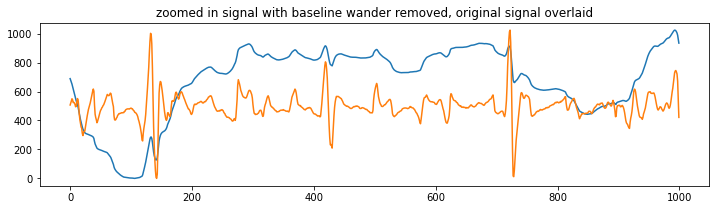

C:\Users\ashwi\anaconda3\lib\site-packages\numpy\ma\core.py:5246: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
C:\Users\ashwi\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\ashwi\anaconda3\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-12-091168bd60b0>:17: UserWarning: Warning: converting a masked element to nan.
  print('%s: %f' %(measure, m[measure]))


bpm: 125.874126
ibi: 476.666667
sdnn: 0.000000
sdsd: nan
rmssd: nan
pnn20: nan
pnn50: nan
hr_mad: 0.000000
sd1: nan
sd2: nan
s: nan
sd1/sd2: nan
breathingrate: nan


<Figure size 864x288 with 0 Axes>

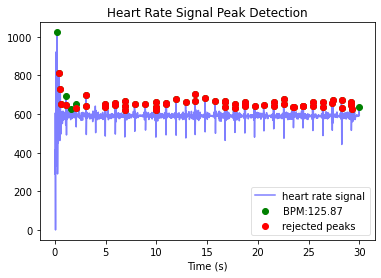

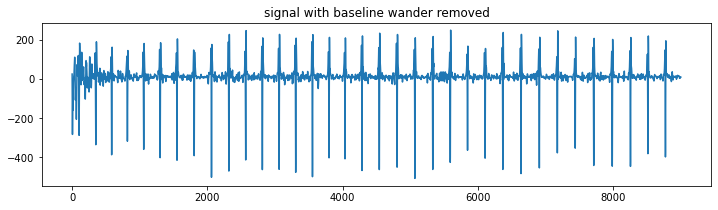

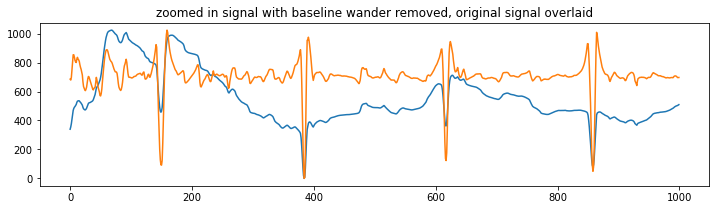

bpm: 553.846154
ibi: 108.333333
sdnn: 36.704526
sdsd: 23.333333
rmssd: 83.333333
pnn20: 1.000000
pnn50: 1.000000
hr_mad: 23.333333
sd1: 56.568542
sd2: 16.499158
s: 2932.153143
sd1/sd2: 3.428571
breathingrate: 2.314815


C:\Users\ashwi\anaconda3\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 864x288 with 0 Axes>

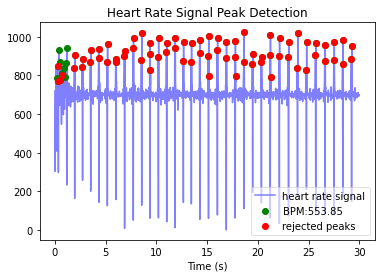

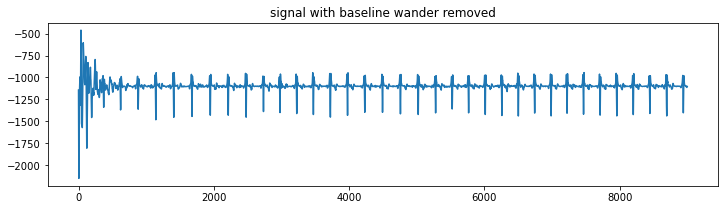

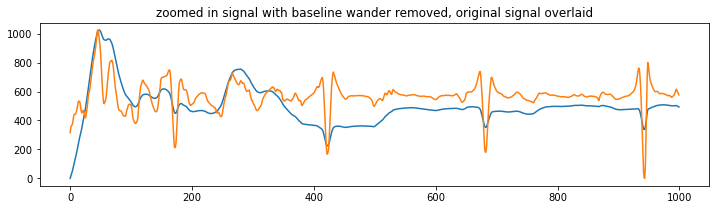

bpm: 285.714286
ibi: 210.000000
sdnn: 126.892030
sdsd: 42.510130
rmssd: 107.434735
pnn20: 1.000000
pnn50: 0.800000
hr_mad: 60.000000
sd1: 74.972588
sd2: 27.268215
s: 6422.573519
sd1/sd2: 2.749450
breathingrate: 0.681199


C:\Users\ashwi\anaconda3\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 864x288 with 0 Axes>

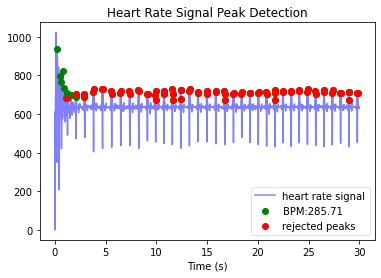

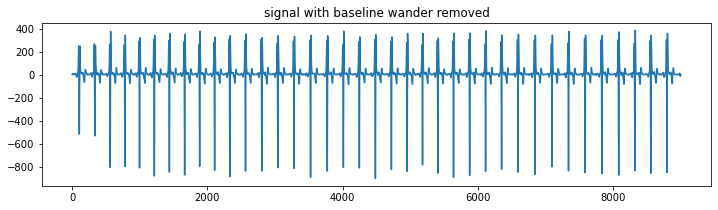

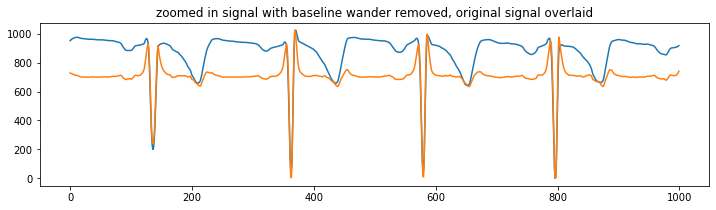

C:\Users\ashwi\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ashwi\anaconda3\lib\site-packages\numpy\core\_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\ashwi\anaconda3\lib\site-packages\numpy\ma\core.py:5246: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
C:\Users\ashwi\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\ashwi\anaconda3\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-12-091168bd60b0>:17: UserWarning: Warning: converting a

bpm: nan
ibi: nan
sdnn: nan
sdsd: nan
rmssd: nan
pnn20: nan
pnn50: nan
hr_mad: nan
sd1: nan
sd2: nan
s: nan
sd1/sd2: nan
breathingrate: nan


<Figure size 864x288 with 0 Axes>

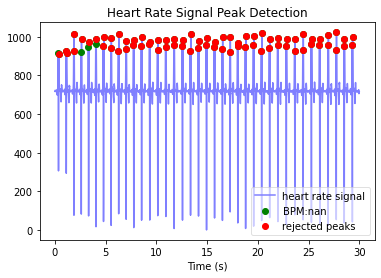

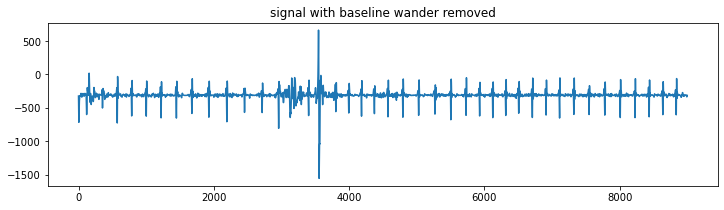

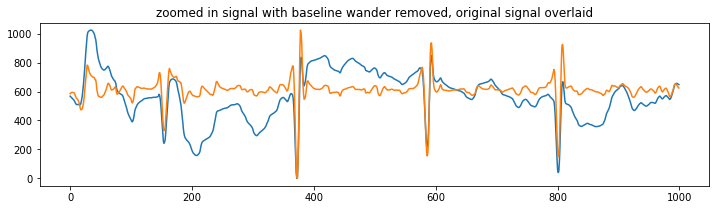

C:\Users\ashwi\anaconda3\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


bpm: 85.118220
ibi: 704.901961
sdnn: 82.129482
sdsd: 23.311678
rmssd: 40.676104
pnn20: 0.545455
pnn50: 0.181818
hr_mad: 46.666667
sd1: 28.129636
sd2: 78.053101
s: 6897.697409
sd1/sd2: 0.360391
breathingrate: 0.083486


<Figure size 864x288 with 0 Axes>

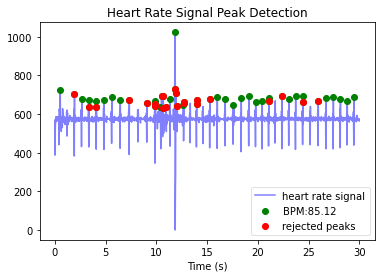

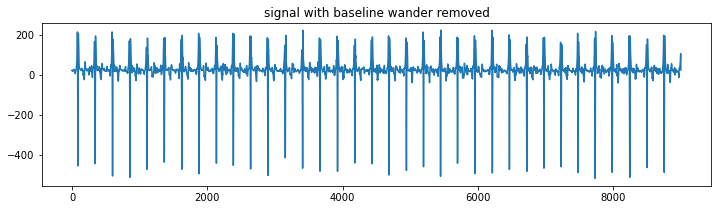

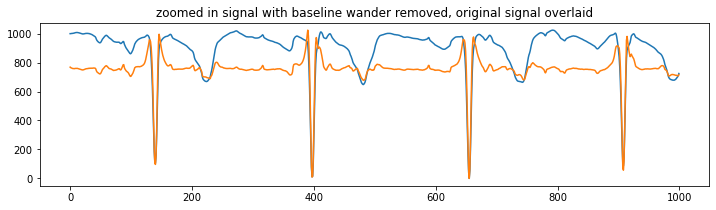

C:\Users\ashwi\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ashwi\anaconda3\lib\site-packages\numpy\core\_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\ashwi\anaconda3\lib\site-packages\numpy\ma\core.py:5246: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
C:\Users\ashwi\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\ashwi\anaconda3\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-12-091168bd60b0>:17: UserWarning: Warning: converting a

bpm: nan
ibi: nan
sdnn: nan
sdsd: nan
rmssd: nan
pnn20: nan
pnn50: nan
hr_mad: nan
sd1: nan
sd2: nan
s: nan
sd1/sd2: nan
breathingrate: nan


<Figure size 864x288 with 0 Axes>

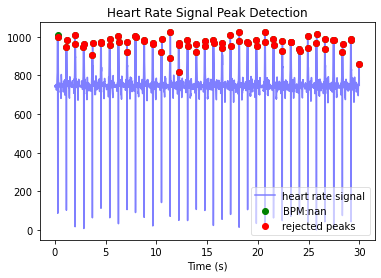

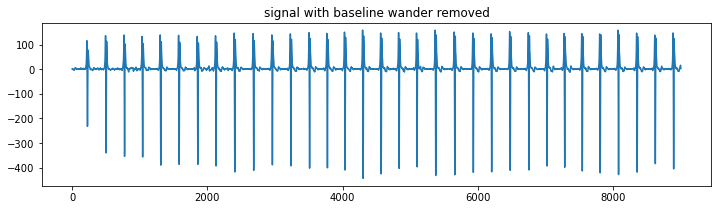

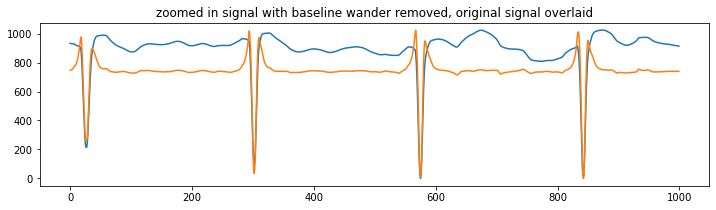

bpm: nan
ibi: nan
sdnn: nan
sdsd: nan
rmssd: nan
pnn20: nan
pnn50: nan
hr_mad: nan
sd1: nan
sd2: nan
s: nan
sd1/sd2: nan
breathingrate: nan


C:\Users\ashwi\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ashwi\anaconda3\lib\site-packages\numpy\core\_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\ashwi\anaconda3\lib\site-packages\numpy\ma\core.py:5246: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
C:\Users\ashwi\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\ashwi\anaconda3\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-12-091168bd60b0>:17: UserWarning: Warning: converting a

<Figure size 864x288 with 0 Axes>

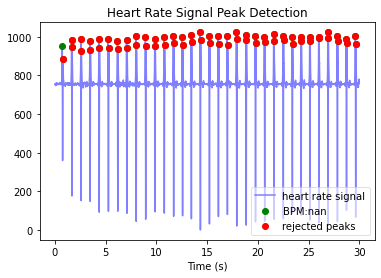

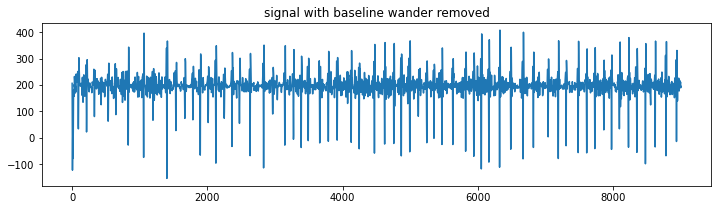

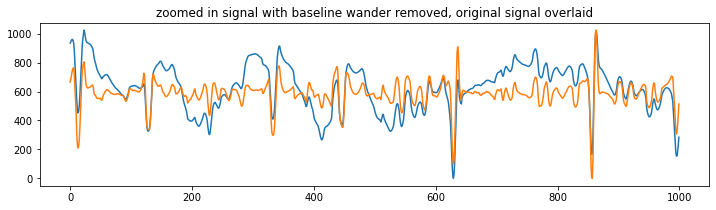

bpm: 135.552913
ibi: 442.631579
sdnn: 125.318677
sdsd: 97.096744
rmssd: 169.008547
pnn20: 0.750000
pnn50: 0.750000
hr_mad: 56.666667
sd1: 115.966650
sd2: 146.695073
s: 53443.945387
sd1/sd2: 0.790529
breathingrate: 0.356888


C:\Users\ashwi\anaconda3\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 864x288 with 0 Axes>

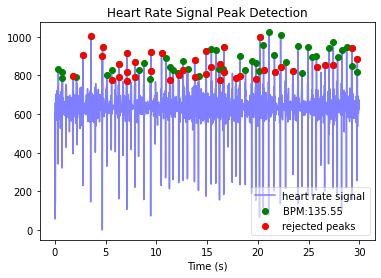

In [12]:
noisy_l=[]
for index in noisy_indices:
    
    np.savetxt("GFG.csv", 
               list(df['ECG'][index].split(',')),
               delimiter =", ", 
               fmt ='% s')
    data = hp.get_data('GFG.csv')
    
    filtered = filter_and_visualise(hp.get_data('GFG.csv'), 300)
    wd, m = hp.process(hp.scale_data(filtered), 300)

    plt.figure(figsize=(12,4))
    hp.plotter(wd, m)

    for measure in m.keys():
        print('%s: %f' %(measure, m[measure]))
        
    temp = list(m.values())
    temp.append(df['Classification'][index])
    noisy_l.append(temp)

    

## Saving Data with noise as csv

In [14]:
# Merging normal data and processed noisy data
temp = features
temp.extend(noisy_l)
print(len(temp))

3500


In [73]:
m.keys()

dict_keys(['bpm', 'ibi', 'sdnn', 'sdsd', 'rmssd', 'pnn20', 'pnn50', 'hr_mad', 'sd1', 'sd2', 's', 'sd1/sd2', 'breathingrate'])

In [16]:
import csv

# field names 
fields = ['bpm', 'ibi', 'sdnn', 'sdsd', 'rmssd', 'pnn20', 'pnn50', 'hr_mad', 'sd1', 'sd2', 's', 'sd1/sd2', 'breathingrate','Classification']

with open('pro_data_with_noise.csv', 'w') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
      
    write.writerow(fields)
    write.writerows(temp)